# Support Center Queue: M/M/1 

###  Bus 36109 "Advanced Decision Modeling with Python", Don Eisenstein
Don Eisenstein &copy; Copyright 2020, University of Chicago 

---

Jill manages a software support center.  Jill wants to run an analysis on how long support requests remain in the system before getting resolved.  Collecting some stats and showing a Histogram of request time in system seems like a nice outcome.  Jill has data of when each request enters the system, and when each request is resolved.  

First, she wants to simulate many days, and experiment with adding staff, etc.  The first step is to generate arrivals to the support center randomly, and generate random service times --- A monte carlo simulation.  She knows from her intro to Ops class (which she loved), that one way to help validate her code is to compare it to a theoretical M/M/1 queueing system.  Once she sees her code track the theoretical values, she would feel better about making changes to the distribution, etc.  That is, she will have confidence that her code is working.   

- Jobs arrive to the support center with interarrival times according to an exponential distribution
- Service times are generated according to an exponential distribution
- Still just one server (for now!), and thus she will be simulating an M/M/1 queueing system

In [1]:
import simpy 
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

#### Some new SimPy is needed
- Have jobs arrive to simulation randomly
- Have jobs contend for a shared resource, and queue when busy

#### Let's start with dealing with a shared resource


In [2]:
# Create NUMBER_OF_ARRIVALS arrivals with interarrival times 
# Exponentially distributed with mean MEAN_TIME_BETWEEN_ARRIVALS
# And service times exponentially distributed with MEAN_SERVICE_TIME
NUM_JOBS = 100000
MEAN_TIME_BETWEEN_ARRIVALS = 200
MEAN_SERVICE_DURATION = 190

In [3]:
class Job(object):
    def __init__(self, env, name, arrival_time, service_duration):
        # Store the simulation environment
        self.env = env
        self.name = name
        self.arrival_time = arrival_time
        # Note our convention:  "time" vs "duration"
        self.service_duration = service_duration
        self.enter_service_time = None
        self.departure_time = None
        
        #print(f'Create Job {self.name}')
        # Start the process everytime an instance is created.
        env.process(self.process_thru_queue())
        
    def process_thru_queue(self):
        yield self.env.timeout(self.arrival_time)
        #print('Job arrives at %d' % self.env.now)
        request = server_resource.request()  # request the server
        yield request 

        self.enter_service_time = env.now
        yield env.timeout(self.service_duration)  # server processes job
        server_resource.release(request)      # you must free up the server

        # Job completes service 
        #print('Service completed at %d' % self.env.now)
        self.departure_time = env.now

In [4]:
def generate_jobs(env, number):
    jobs = []
    arrival_time = 0
    
    for i in range(number):
        job_name = f'Job_{i}'      # create a job name string 
        service_duration = np.random.exponential(MEAN_SERVICE_DURATION)

        job = Job(env, job_name, arrival_time, service_duration)
        jobs.append(job)
        arrival_time = arrival_time + np.random.exponential(MEAN_TIME_BETWEEN_ARRIVALS)
        
    return jobs 

In [5]:
env = simpy.Environment()
server_resource = simpy.Resource(env, capacity=1)

In [6]:
jobs=generate_jobs(env,NUM_JOBS)

In [7]:
env.run()

### Compute average time a job spends in the system

In [8]:
# loop through all the jobs
system_times = []
for job in jobs:
    system_times.append(job.departure_time-job.arrival_time)
print(f'average time in system is {np.mean(system_times)}')

average time in system is 3393.886097390965


### Compare to M/M/1 theoretical average time in system
- $CT = \frac{1}{\mu - \lambda}$
- Here, $\mu$ is the average service rate, 1/MEAN_SERVICE_TIME
- And $\lambda$ is the average arrival rate, 1/MEAN_TIME_BETWEEN_ARRIVALS

In [9]:
print('The theoretical average system time is:',1/( (1/MEAN_SERVICE_DURATION) - (1/MEAN_TIME_BETWEEN_ARRIVALS) ))

The theoretical average system time is: 3800.000000000003


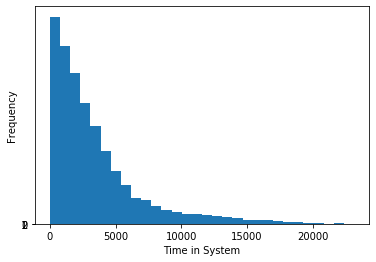

In [10]:
# Tinker with number of bins, until it looks right
plt.hist(system_times,bins=30)
# you can customize the exact tick marks on an axis
plt.yticks(range(0,3))
plt.ylabel('Frequency');
plt.xlabel('Time in System');

# Homework/In-class work

1. Suppose customers arrive to your queue with an exponentially distrubuted time between arrivals of 30 seconds and are served by one of two *parallel* servers, each server can, on average serve a customer in 50 seconds, with the service time exponentially distributed.

1. Now, return back to one server, but add a second server in *series*.  That is, each job first is serviced by a single Server 1, and then by a single Server 2.  Assume to exponential arrivals with a mean time between arrivals of 200 and exponential service time with mean of 190 for each server.  
   - Compute the average system time
   - Plot a histogram of total time in system


1. Of course, we may want to use other distributions in a simulation.  Write functions for the exponential and these other distributions,  `normal`, `triangular`,  and `uniform`, explore the `numpy` documentation:  https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

   - remember, make sure your functions return only positive values for our purposes.
   - try out each of your functions to make sure they work as expected
   

1.  Consider the Paramount restaurant.  
    - Model a busy input stream of customers in the morning rush ...
    - Consider 4 cooks that ...
    - Consider community seating with XX seats and the dining experience ...
    